In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

ModuleNotFoundError: No module named 'ydata_profiling'

In [2]:
df = pd.read_csv('/Users/saikiranpennam/Documents/RA/Western_Sugar_AI_Assessment_Working/2023/Book1.csv', parse_dates=True, index_col=0)
df.head(50)

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_2487/1719714388.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/saikiranpennam/Documents/RA/Western_Sugar_AI_Assessment_Working/2023/Book1.csv', parse_dates=True, index_col=0)


,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,...,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00,5.982146,0.751015,5.982146,0.751015,518.197400,0.0,0.0,0.755994,0.158802,-0.058369,...,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:00:00,5.982146,0.751378,5.982146,0.751378,518.197400,0.0,0.0,0.749697,0.160922,-0.059380,...,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:01:00,5.982146,0.751719,5.982146,0.751719,518.197400,0.0,0.0,0.743771,0.162917,-0.059343,...,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:02:00,5.982146,0.752317,5.982146,0.752317,518.197400,0.0,0.0,0.733400,0.162520,-0.059280,...,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:03:00,5.982146,0.752990,5.982146,0.752990,518.197400,0.0,0.0,0.745490,0.162072,-0.059209,...,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:03:00,5.980115,0.753118,5.980115,0.753118,518.197400,0.0,0.0,0.747793,0.161987,-0.059195,...,0.0,0.468072,-0.074276,0.253284,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:03:00,5.977746,0.753267,5.977746,0.753267,516.772300,0.0,0.0,0.750479,0.161888,-0.059179,...,0.0,0.468072,-0.074308,0.253238,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:05:00,5.960824,0.754429,5.960824,0.754429,506.592800,0.0,0.0,0.769670,0.161177,-0.059066,...,0.0,0.468072,-0.074536,0.252913,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 00:06:00,5.946102,0.755441,5.946102,0.755441,497.736600,0.0,0.0,0.786366,0.160559,-0.058967,...,0.0,0.468072,-0.074734,0.252629,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102674 entries, 2022-09-01 00:00:00 to 2023-05-16 07:31:00
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Filter#1_CTRL_FRC                       102478 non-null  float64
 1   Filter#1_CTRL_PRC                       102529 non-null  float64
 2   Filter#1_Inlet_Flow                     102562 non-null  float64
 3   Filter#1_Inlet_Pressure                 102513 non-null  float64
 4   Filter#1_Turbidity                      102447 non-null  float64
 5   Filter#2_CTRL_FRC                       102486 non-null  float64
 6   Filter#2_CTRL_PRC                       102473 non-null  float64
 7   Filter#2 _Inlet_Flow                    102600 non-null  float64
 8   Filter#2_Wash_Spray_Flow                90453 non-null   float64
 9   Filter#2 _Inlet_Pressure                102585 non-null  float64
 10  Filter#2_O

In [4]:
# TODO - filter by values, with frequency 30s and 1Min, plot for each filter
# TODO - Redundancy in the code, have only one function for all the filters...
'''
# TODO - 3 Conditions -- High Turbidity Low Flow (Dirty)
                        Zero Turbidity Zero Flow (Offline)

                        Pre-Coat
                        High Flow Zero Turbidity
                        High Flow Zero Pressure
'''
# Switched to 1 hour for a better representation in terms of trend, seasonality and mainly for pattern analysis...

'\n# TODO - 3 Conditions -- High Turbidity Low Flow (Dirty)\n                        Zero Turbidity Zero Flow (Offline)\n\n                        Pre-Coat\n                        High Flow Zero Turbidity\n                        High Flow Zero Pressure\n'

In [4]:
# Resample to 1-day intervals
df_1hour = df.resample('H').mean()
df_1hour

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,...,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00,5.948842,0.762126,5.948842,0.762126,436.645052,0.0,0.0,0.761236,0.156168,-0.058269,...,0.0,0.462866,-0.077595,0.249652,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 01:00:00,5.929180,0.818891,5.929180,0.818891,4.409362,0.0,0.0,0.696011,0.130756,-0.052786,...,0.0,0.445853,-0.087181,0.234845,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 02:00:00,5.929180,0.855701,5.929180,0.855701,3.501818,0.0,0.0,0.706187,0.139350,-0.049201,...,0.0,0.469541,-0.094402,0.224528,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 03:00:00,5.929180,0.897416,5.929180,0.897416,6.510937,0.0,0.0,0.747934,NaN,-0.045137,...,0.0,0.496386,-0.100942,0.214898,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 04:00:00,5.951624,0.935463,5.951624,0.935463,9.166942,0.0,0.0,0.772104,NaN,-0.045627,...,0.0,0.519563,-0.097269,0.213692,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16 03:00:00,5.876133,1.183726,5.876133,1.183726,2.906650,250.0,0.0,0.786366,0.090971,-0.042619,...,0.0,0.530282,-0.103138,78.914647,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-16 04:00:00,5.876133,1.194980,5.876133,1.194980,2.724546,250.0,0.0,0.773923,0.092106,-0.045602,...,0.0,0.530966,-0.099189,79.262578,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-16 05:00:00,5.876133,1.214499,5.876133,1.214499,2.481739,250.0,0.0,0.727937,NaN,-0.041944,...,0.0,0.562394,-0.101825,78.856260,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='DateTime'>

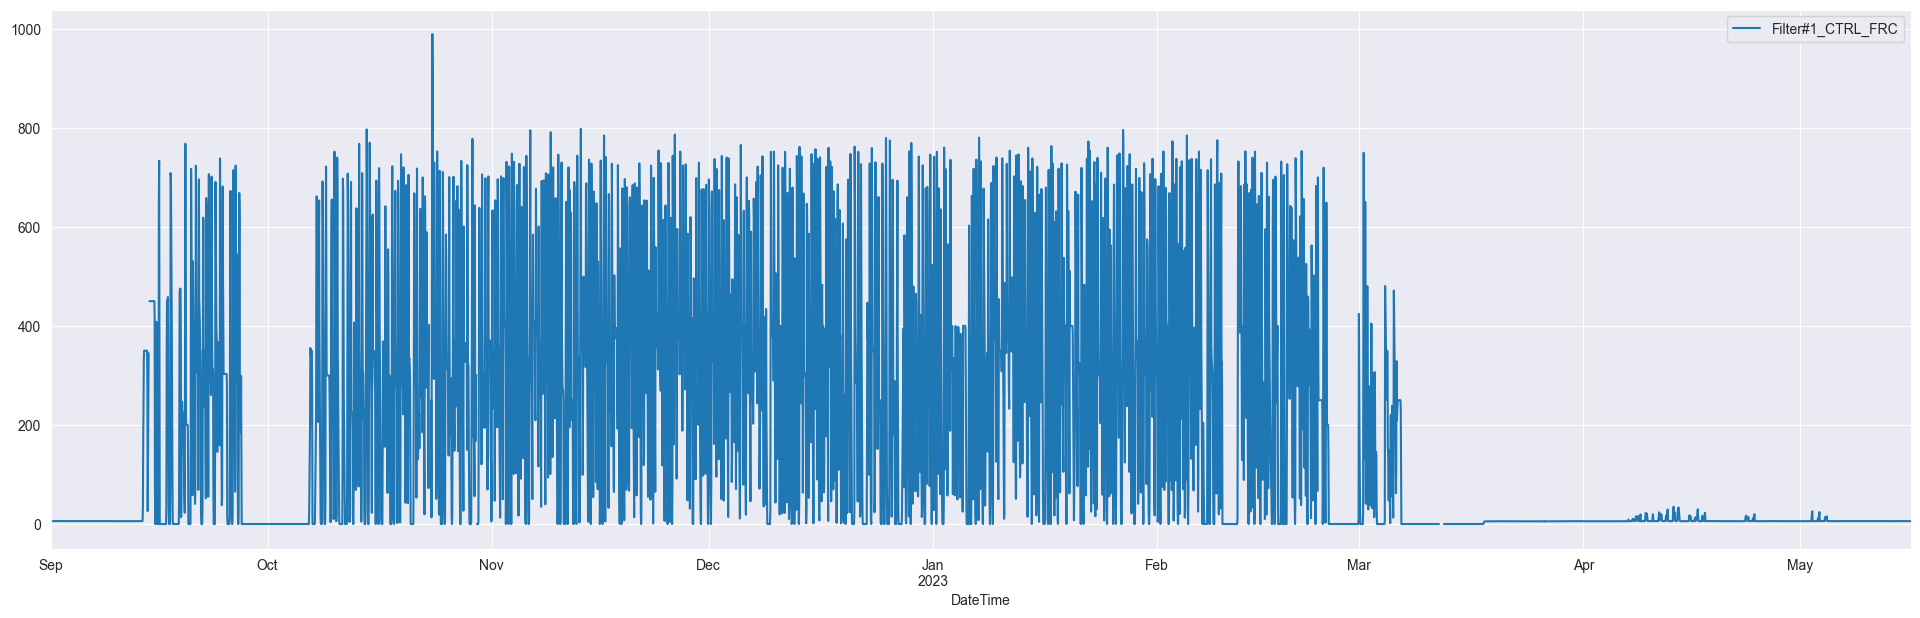

In [5]:
df_1hour.plot(y=['Filter#1_CTRL_FRC'], figsize=(24, 7))

In [6]:
df_1hour["Filter#1_Turbidity"].max(), df_1hour["Filter#1_Turbidity"].min()

(518.1976, -124.96051)

In [5]:
#df_1hour["Filter#1_Turbidity"].hist()
profile = ProfileReport(df, title="Western Sugar Report", explorative=True)
profile.to_file("WS_Report.html")

#SQL queries...

In [7]:
from pandasql import sqldf

In [8]:
filter_data = sqldf("SELECT * FROM df")
filter_data

,DateTime,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,...,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity,Filter#1_Flow_Control_Valve,Filter#2_Flow_Control_Valve,Filter#3_Flow_Control_Valve,Filter#4 _Flow_Control_Valve,Filter#5_Flow_Control_Valve,Filter#6_Flow_Control_Valve
0,2022-09-01 00:00:00.000000,5.982146,0.751015,5.982146,0.751015,518.197400,0.0,0.0,0.755994,0.158802,...,0.0,0.468072,-0.086892,0.247091,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-01 00:00:00.000000,5.982146,0.751378,5.982146,0.751378,518.197400,0.0,0.0,0.749697,0.160922,...,0.0,0.468072,-0.085880,0.243723,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-01 00:01:00.000000,5.982146,0.751719,5.982146,0.751719,518.197400,0.0,0.0,0.743771,0.162917,...,0.0,0.468072,-0.081598,0.247289,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-01 00:02:00.000000,5.982146,0.752317,5.982146,0.752317,518.197400,0.0,0.0,0.733400,0.162520,...,0.0,0.468072,-0.074105,0.253528,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-01 00:03:00.000000,5.982146,0.752990,5.982146,0.752990,518.197400,0.0,0.0,0.745490,0.162072,...,0.0,0.468072,-0.074249,0.253323,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102669,2023-05-16 07:26:00.000000,5.876133,1.256753,5.876133,1.256753,1.998185,250.0,0.0,0.730467,0.065560,...,0.0,0.523872,-0.112380,77.467890,0.0,0.0,0.0,0.0,0.0,0.0
102670,2023-05-16 07:28:00.000000,5.876133,1.256753,5.876133,1.256753,1.998298,250.0,0.0,0.731505,0.066290,...,0.0,0.523359,-0.112380,77.449410,0.0,0.0,0.0,0.0,0.0,0.0
102671,2023-05-16 07:28:00.000000,NaN,1.256753,NaN,1.256753,1.998342,250.0,0.0,0.731907,0.066574,...,0.0,0.523160,-0.112380,77.442250,0.0,0.0,0.0,0.0,0.0,0.0
102672,2023-05-16 07:29:00.000000,NaN,1.256753,NaN,1.256753,1.998346,250.0,0.0,0.731949,0.066603,...,0.0,0.523139,-0.112380,77.441500,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
query1 = """
            SELECT *
            FROM filter1_df
            WHERE Filter#1_Inlet_Flow > 100, Turbidity > 250
         """

# Filter#1

In [8]:
filter1_df = df_1hour.iloc[:,0:5]
filter1_df.head(50)

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity
DateTime,,,,,
2022-09-01 00:00:00,5.948842,0.762126,5.948842,0.762126,436.645052
2022-09-01 01:00:00,5.929180,0.818891,5.929180,0.818891,4.409362
2022-09-01 02:00:00,5.929180,0.855701,5.929180,0.855701,3.501818
2022-09-01 03:00:00,5.929180,0.897416,5.929180,0.897416,6.510937
2022-09-01 04:00:00,5.951624,0.935463,5.951624,0.935463,9.166942
2022-09-01 05:00:00,5.953699,0.979761,5.953699,0.979761,9.356571
2022-09-01 06:00:00,5.926904,1.019046,5.926904,1.019046,9.369507
2022-09-01 07:00:00,5.902316,1.038592,5.902316,1.038592,7.548915
2022-09-01 08:00:00,5.901838,1.016674,5.901838,1.016674,1.050120


In [8]:
filter1_df.corr(numeric_only=True, method = 'pearson', min_periods=1)

,Filter#1_CTRL_FRC,Filter#1_CTRL_PRC,Filter#1_Inlet_Flow,Filter#1_Inlet_Pressure,Filter#1_Turbidity
Filter#1_CTRL_FRC,1.000000,0.494805,0.935828,0.449789,0.273513
Filter#1_CTRL_PRC,0.494805,1.000000,0.487766,0.959757,0.243763
Filter#1_Inlet_Flow,0.935828,0.487766,1.000000,0.444927,0.282916
Filter#1_Inlet_Pressure,0.449789,0.959757,0.444927,1.000000,0.248156
Filter#1_Turbidity,0.273513,0.243763,0.282916,0.248156,1.000000


<AxesSubplot:>

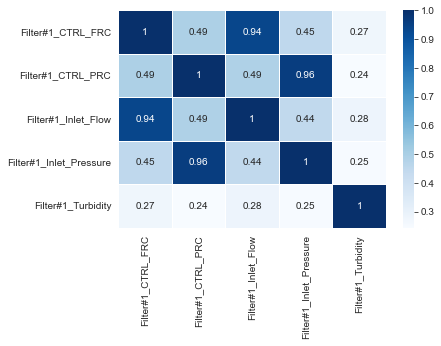

In [9]:
cormat1 = filter1_df.corr()
round(cormat1, 2)
sns.heatmap(cormat1,annot=True, cmap="Blues", linewidths=.7)

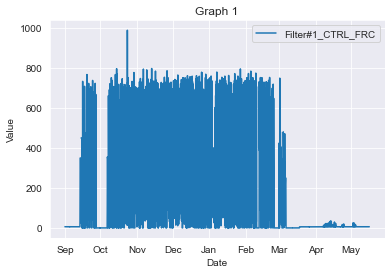

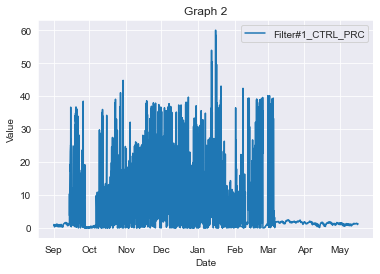

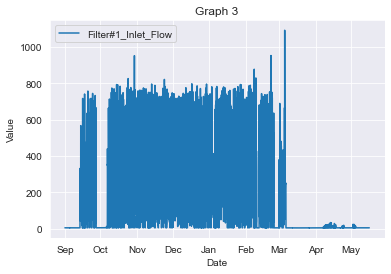

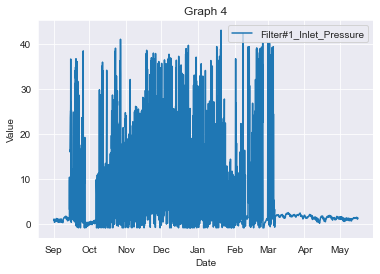

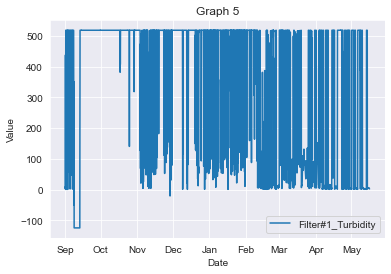

Plots saved to Filter#1.pdf


In [27]:
from matplotlib.dates import MonthLocator, DateFormatter

# Generate a mask to identify NaN values in each column
nan_mask = df_1hour.isna()

# Define a color palette with 5 distinct colors
color_palette = plt.cm.get_cmap('tab10', len(df_1hour.columns))

# Create a PDF file to save the plots
pdf_filename = 'Filter#1.pdf'
pdf = PdfPages(pdf_filename)

# Iterate
for i, columns_subset in enumerate([df_1hour.columns[0:1], df_1hour.columns[1:2], df_1hour.columns[2:3], df_1hour.columns[3:4], df_1hour.columns[4:5]]):
    # Create a new figure and axis objects
    fig, ax = plt.subplots()

    # Line pLot for each column, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#2

In [28]:
filter2_df = df_1hour.iloc[:,5:12]
filter2_df

,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity
DateTime,,,,,,,
2022-09-01 00:00:00,0.0,0.0,0.761236,0.156168,-0.058269,0.297358,21.561319
2022-09-01 01:00:00,0.0,0.0,0.696011,0.130756,-0.052786,0.308414,20.744050
2022-09-01 02:00:00,0.0,0.0,0.706187,0.139350,-0.049201,0.303857,29.527277
2022-09-01 03:00:00,0.0,0.0,0.747934,NaN,-0.045137,0.292736,41.038934
2022-09-01 04:00:00,0.0,0.0,0.772104,NaN,-0.045627,0.278516,41.019181
...,...,...,...,...,...,...,...
2023-05-16 03:00:00,250.0,0.0,0.786366,0.090971,-0.042619,0.228968,50.306297
2023-05-16 04:00:00,250.0,0.0,0.773923,0.092106,-0.045602,0.346062,50.363895
2023-05-16 05:00:00,250.0,0.0,0.727937,NaN,-0.041944,0.202537,50.478489


In [29]:
filter2_df.corr(numeric_only=True, method = 'pearson', min_periods=1)

,Filter#2_CTRL_FRC,Filter#2_CTRL_PRC,Filter#2 _Inlet_Flow,Filter#2_Wash_Spray_Flow,Filter#2 _Inlet_Pressure,Filter#2_Outlet_Pressure,Filter#2_Turbidity
Filter#2_CTRL_FRC,1.000000,0.504540,0.868930,0.381757,0.431934,0.537797,-0.215542
Filter#2_CTRL_PRC,0.504540,1.000000,0.530869,0.368715,0.961709,0.518362,-0.107352
Filter#2 _Inlet_Flow,0.868930,0.530869,1.000000,0.414376,0.471914,0.592530,-0.203245
Filter#2_Wash_Spray_Flow,0.381757,0.368715,0.414376,1.000000,0.378038,0.499881,-0.078842
Filter#2 _Inlet_Pressure,0.431934,0.961709,0.471914,0.378038,1.000000,0.527319,-0.103199
Filter#2_Outlet_Pressure,0.537797,0.518362,0.592530,0.499881,0.527319,1.000000,-0.205867
Filter#2_Turbidity,-0.215542,-0.107352,-0.203245,-0.078842,-0.103199,-0.205867,1.000000


<AxesSubplot:>

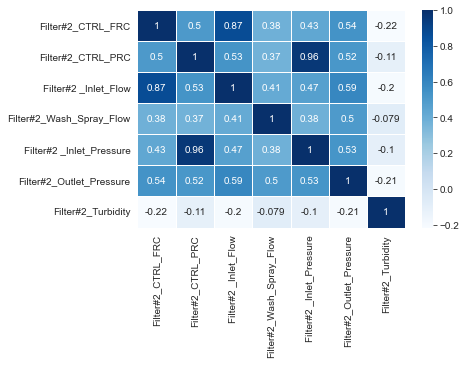

In [30]:
cormat2 = filter2_df.corr()
round(cormat2, 2)
sns.heatmap(cormat2,annot=True, cmap="Blues", linewidths=.7)

In [31]:
# TODO - Figure out to represent NaN values with different color for rest of the filters...

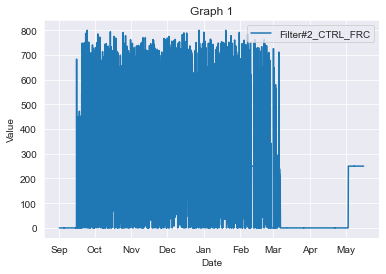

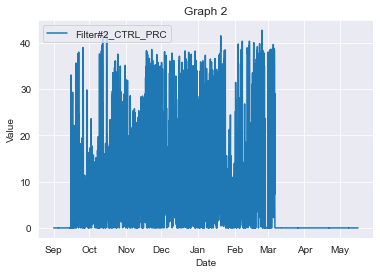

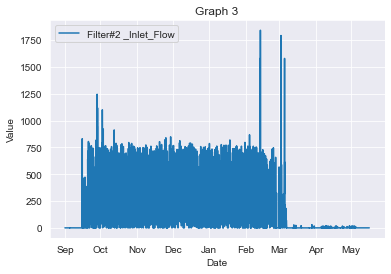

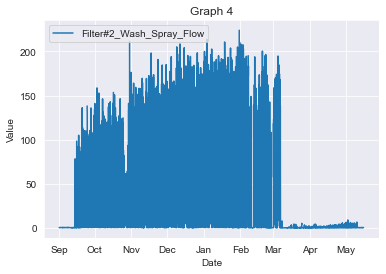

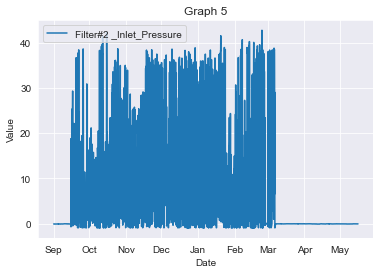

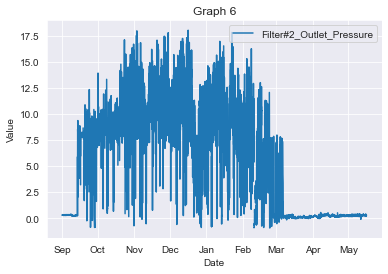

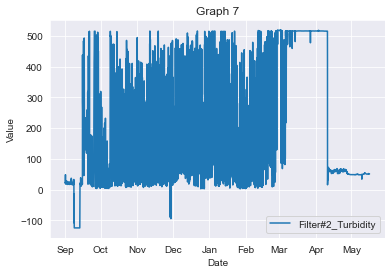

Plots saved to Filter#2.pdf


In [32]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#2.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[5:6], df_1hour.columns[6:7], df_1hour.columns[7:8], df_1hour.columns[8:9], df_1hour.columns[9:10], df_1hour.columns[10:11], df_1hour.columns[11:12]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#3

In [22]:
filter3_df = df_1hour.iloc[:,12:17]
filter3_df

,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity
DateTime,,,,,
2022-09-01 00:00:00,0.610734,0.0,0.610734,-0.214560,116.668886
2022-09-01 01:00:00,0.608946,0.0,0.608946,-0.213769,119.266843
2022-09-01 02:00:00,0.598096,0.0,0.598096,-0.209536,120.994133
2022-09-01 03:00:00,0.585800,0.0,0.585800,-0.207529,122.452280
2022-09-01 04:00:00,0.579362,0.0,0.579362,-0.207246,121.922754
...,...,...,...,...,...
2023-05-16 03:00:00,0.632700,0.0,0.632700,-0.180101,62.547070
2023-05-16 04:00:00,0.631865,0.0,0.631865,-0.180421,60.914955
2023-05-16 05:00:00,0.673036,0.0,0.673036,-0.177850,74.675651


In [23]:
filter3_df.corr(method = 'pearson', min_periods=1)

,FILTER#3_CTRL_FRC,FILTER#3_CTRL_PRC,Filter#3_Inlet Flow,Filter#3_Inlet_Pressure,Filter#3_Turbidity
FILTER#3_CTRL_FRC,1.000000,0.507720,0.931558,0.440589,-0.421036
FILTER#3_CTRL_PRC,0.507720,1.000000,0.496438,0.965258,-0.292281
Filter#3_Inlet Flow,0.931558,0.496438,1.000000,0.438255,-0.450831
Filter#3_Inlet_Pressure,0.440589,0.965258,0.438255,1.000000,-0.299478
Filter#3_Turbidity,-0.421036,-0.292281,-0.450831,-0.299478,1.000000


<AxesSubplot:>

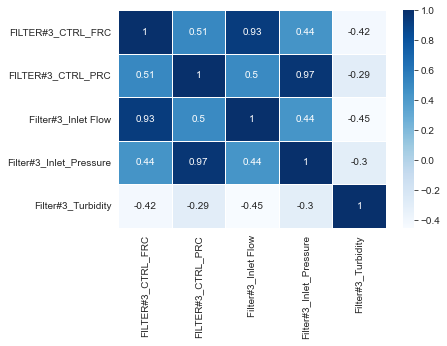

In [24]:
cormat3 = filter3_df.corr()
round(cormat3, 2)
sns.heatmap(cormat3, annot=True, cmap="Blues", linewidths=1)

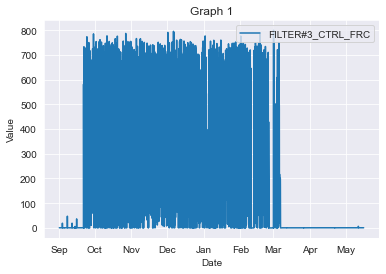

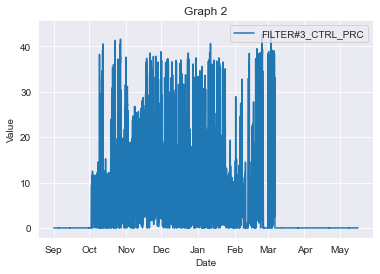

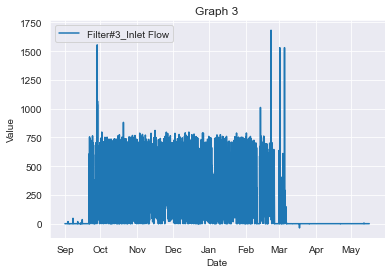

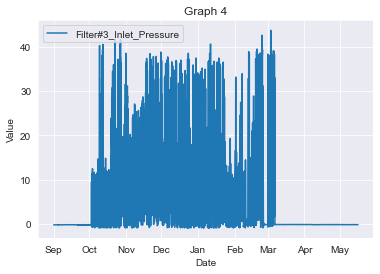

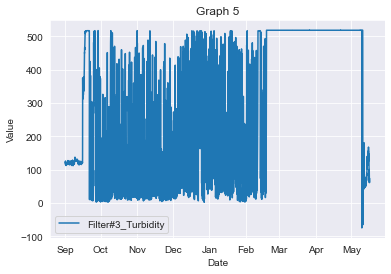

Plots saved to Filter#3.pdf


In [35]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#3.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[12:13], df_1hour.columns[13:14], df_1hour.columns[14:15], df_1hour.columns[15:16], df_1hour.columns[16:17]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)
        # Highlight NaN values with a different color
        line.set_markerfacecolor('red')  # Change this color as desired

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#4

In [26]:
filter4_df = df_1hour.iloc[:,17:21]
filter4_df

,FILTER#4_CTRL_FRC,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity
DateTime,,,,
2022-09-01 00:00:00,0.0,0.634346,0.030467,111.250648
2022-09-01 01:00:00,0.0,0.662452,0.035625,105.327000
2022-09-01 02:00:00,0.0,0.651408,0.039437,109.470900
2022-09-01 03:00:00,0.0,0.638892,0.043757,113.376240
2022-09-01 04:00:00,0.0,0.632148,0.044146,111.317857
...,...,...,...,...
2023-05-16 03:00:00,0.0,0.769896,0.074313,120.618167
2023-05-16 04:00:00,0.0,0.726692,0.073714,120.519815
2023-05-16 05:00:00,0.0,0.717729,0.074827,119.987200


In [27]:
filter4_df.corr(method = 'pearson', min_periods=1)

,FILTER#4_CTRL_FRC,Filter#4 _Inlet_Flow,Filter#4_Inlet_Pressure,Filter#4 _Turbidity
FILTER#4_CTRL_FRC,1.000000,0.900943,0.414103,0.134611
Filter#4 _Inlet_Flow,0.900943,1.000000,0.403525,0.076230
Filter#4_Inlet_Pressure,0.414103,0.403525,1.000000,0.240747
Filter#4 _Turbidity,0.134611,0.076230,0.240747,1.000000


<AxesSubplot:>

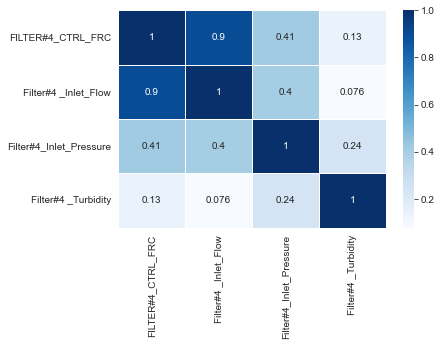

In [28]:
cormat4 = filter4_df.corr()
round(cormat4, 2)
sns.heatmap(cormat4, annot=True, cmap="Blues", linewidths=1)

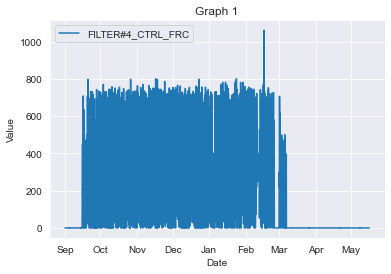

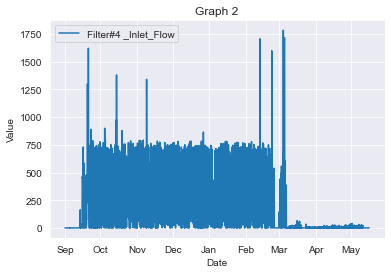

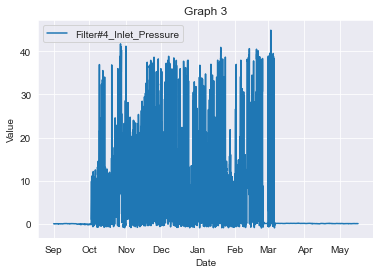

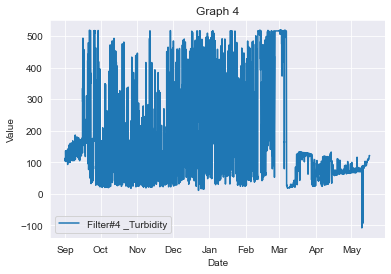

Plots saved to Filter#4.pdf


In [36]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#4.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[17:18], df_1hour.columns[18:19], df_1hour.columns[19:20], df_1hour.columns[20:21]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#5

In [30]:
filter5_df = df_1hour.iloc[:,21:26]
filter5_df

,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity
DateTime,,,,,
2022-09-01 00:00:00,0.0,0.100383,0.378356,0.100383,0.120577
2022-09-01 01:00:00,0.0,0.104690,0.457522,0.104690,0.100791
2022-09-01 02:00:00,0.0,0.107452,0.453128,0.107452,0.096500
2022-09-01 03:00:00,0.0,0.108446,0.432634,0.108446,0.096500
2022-09-01 04:00:00,0.0,0.105680,0.424523,0.105680,0.101785
...,...,...,...,...,...
2023-05-16 03:00:00,0.0,0.127598,0.468072,0.127598,515.895900
2023-05-16 04:00:00,0.0,0.127875,0.451564,0.127875,515.893161
2023-05-16 05:00:00,0.0,0.130596,0.429684,0.130596,515.893650


In [31]:
filter5_df.corr(method = 'pearson', min_periods=1)

,FILTER#5_CTRL_FRC,FILTER#5_CTRL_PRC,Filter#5_Inlet_Flow,Filter#5_Inlet_Pressure,Filter#5 _Turbidity
FILTER#5_CTRL_FRC,1.000000,0.513762,0.902644,0.474364,-0.375525
FILTER#5_CTRL_PRC,0.513762,1.000000,0.482836,0.981054,-0.246336
Filter#5_Inlet_Flow,0.902644,0.482836,1.000000,0.446582,-0.410962
Filter#5_Inlet_Pressure,0.474364,0.981054,0.446582,1.000000,-0.243006
Filter#5 _Turbidity,-0.375525,-0.246336,-0.410962,-0.243006,1.000000


<AxesSubplot:>

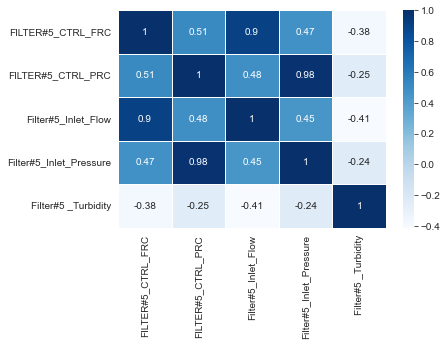

In [32]:
cormat5 = filter5_df.corr()
round(cormat5, 2)
sns.heatmap(cormat5, annot=True, cmap="Blues", linewidths=1)

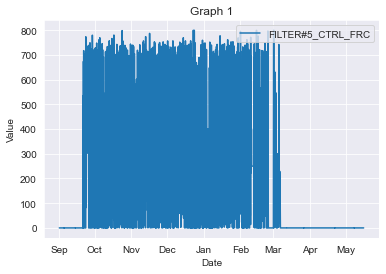

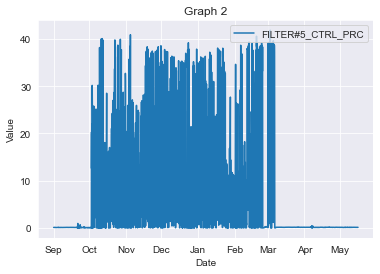

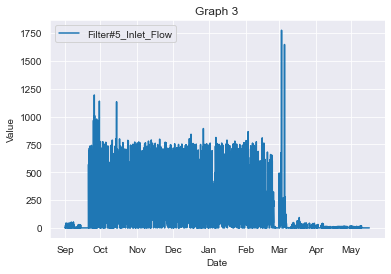

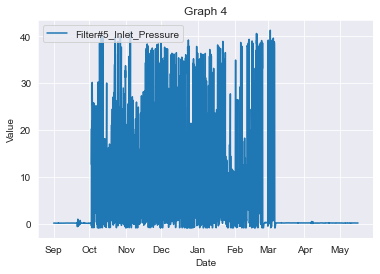

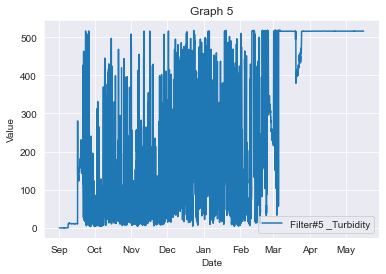

Plots saved to Filter#5.pdf


In [37]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#5.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[21:22], df_1hour.columns[22:23], df_1hour.columns[23:24], df_1hour.columns[24:25], df_1hour.columns[25:26]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")

# Filter#6

In [34]:
filter6_df = df_1hour.iloc[:,26:30]
filter6_df

,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity
DateTime,,,,
2022-09-01 00:00:00,0.0,0.462866,-0.077595,0.249652
2022-09-01 01:00:00,0.0,0.445853,-0.087181,0.234845
2022-09-01 02:00:00,0.0,0.469541,-0.094402,0.224528
2022-09-01 03:00:00,0.0,0.496386,-0.100942,0.214898
2022-09-01 04:00:00,0.0,0.519563,-0.097269,0.213692
...,...,...,...,...
2023-05-16 03:00:00,0.0,0.530282,-0.103138,78.914647
2023-05-16 04:00:00,0.0,0.530966,-0.099189,79.262578
2023-05-16 05:00:00,0.0,0.562394,-0.101825,78.856260


In [35]:
filter6_df.corr(method = 'pearson', min_periods=1)

,FILTER#6_CTRL_FRC,Filter#6_Inlet_Flow,Filter#6 _Inlet_Pressure,Filter#6_Turbidity
FILTER#6_CTRL_FRC,1.000000,0.898197,0.477614,0.068755
Filter#6_Inlet_Flow,0.898197,1.000000,0.478720,0.026557
Filter#6 _Inlet_Pressure,0.477614,0.478720,1.000000,0.113946
Filter#6_Turbidity,0.068755,0.026557,0.113946,1.000000


<AxesSubplot:>

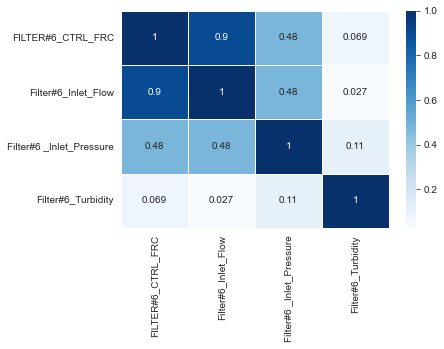

In [36]:
cormat6 = filter6_df.corr()
round(cormat6, 2)
sns.heatmap(cormat6, annot=True, cmap="Blues", linewidths=1)

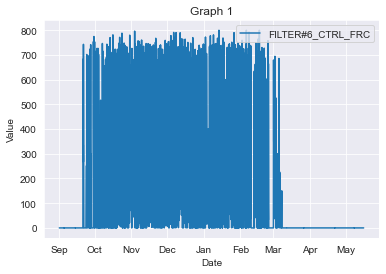

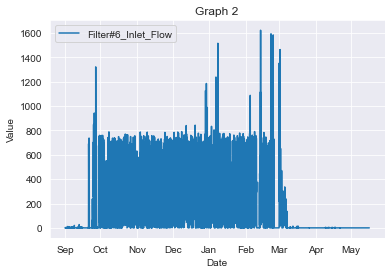

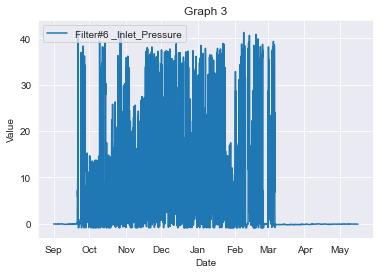

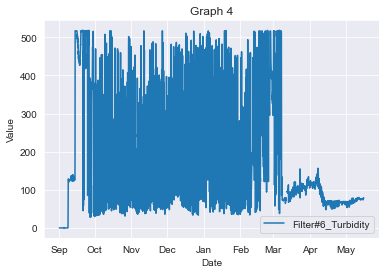

Plots saved to Filter#6.pdf


In [38]:
# Create a PDF file to save the plots
pdf_filename = 'Filter#6.pdf'
pdf = PdfPages(pdf_filename)

# Iterate over subsets of columns to create separate graphs
for i, columns_subset in enumerate([df_1hour.columns[26:27], df_1hour.columns[27:28], df_1hour.columns[28:29], df_1hour.columns[29:30]]):
    # Create a new figure and axis objects for each graph
    fig, ax = plt.subplots()

    # Line plot for each column subset, setting NaN values to a different color
    for j, column in enumerate(columns_subset):
        color = color_palette(j)
        line, = ax.plot(df_1hour.index, df_1hour[column], color=color, label=column)

    # Format x-axis to display only the month
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Add labels and a legend to the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(f'Graph {i+1}')
    ax.legend()

    # Display the plot
    plt.show()

    # Save the current figure to the PDF file
    pdf.savefig(fig)

    # Close the current figure
    plt.close(fig)

# Close the PDF file
pdf.close()

print(f"Plots saved to {pdf_filename}")